<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metropolis - Hastings**
El método de Metropolis-Hastings es un algoritmo de muestreo basado en cadenas de Márkov, utilizado para obtener muestras de una distribución de probabilidad complicada $ f(x) $ cuando no podemos muestrearla directamente.

Su principal objetivo es generar una cadena de valores cuya distribución estacionaria sea precisamente $ f(x) $

$ \\ $

**¿Que es una cadena de Markov?**

Una cadena de Márkov es un proceso estocástico donde el siguiente estado depende únicamente del estado actual:
$$ P(X_{t+1} = x' | X_{t} = x, X_{t-1}, ..., X_0) = P(X_{t+1} = x' | X_{t} = x) $$
Es decir, no tiene memoria.
Para el algoritmo de MH se utiliza este principio para construir una secuencia $ X_0, X_1, X_2, ...  $ que despues de varias iteraciones se "olvida" wel valor inicial y de distribuye segun $ f(x) \\ $.

La idea el método de MH se muestra mas adelante, antes de definirlo

In [8]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definimos la función
$$ f(x_1,x_2) = c * exp [ - \frac{1}{2} ( x_1^2 x_2^2 + x_1^2 + x_2^2 - 8 x_1 - 8 x_2) ] \quad \text{con: } c = \frac{1}{20216.335877} $$

donde 𝑐 es constante de normalización, sin embargo no se necesita porque el metodo Metropolis- Hastings trabaja con proporciones


In [9]:
def f(x1, x2):
  return np.exp(-0.5 * (x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2))

In [10]:
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

La grafica en 2D de la función es de la siguiente manera

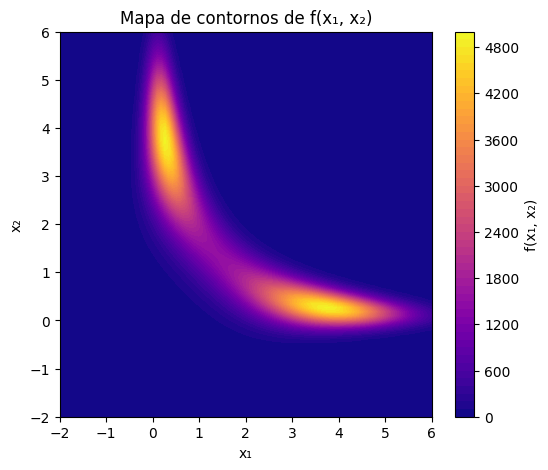

In [61]:
plt.figure(figsize=(6,5))
plt.contourf(X, Y, Z, levels=50, cmap='plasma')
plt.colorbar(label='f(x₁, x₂)')
plt.title("Mapa de contornos de f(x₁, x₂)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

La grafica en 3D de la funcion es de la siguiente manera

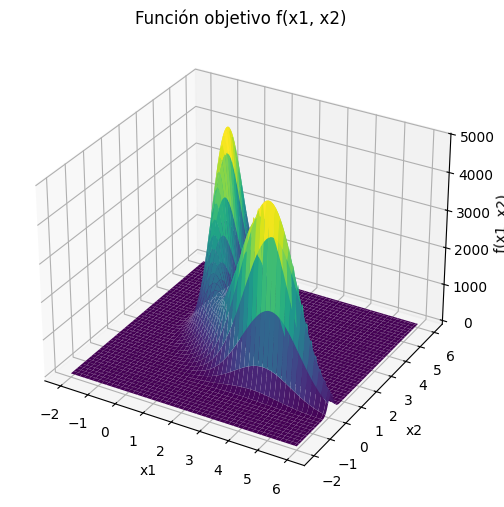

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Función objetivo f(x1, x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
plt.show()

El método genera una cadena de Markov $ {X_t} $ que tiene como distribución estacionaria la función objetivo $ f(x1, x2) $

En cada paso se genera un candidato $ Y ~ q(.|X_t) $, por ejemplo una distribución normal centrada en X_t.

Luego se calcula la probabilidad de aceptación:
$$ \alpha = (X_t,Y) = min (1, \frac{\pi (Y)}{ \pi(X)} ) $$
o en nuestro caso $ \alpha = min (1, \frac{ f(Y)}{ f(X_t)} ) $

Esto nos ayuda a que la cadena se acerque a las regiones de mayor densidad de nuestra función.

\\

Ahora definimos el método de Metropolis-Hastings, siguiendo el algoritmo:

*   **Paso 1**: Inicializr $X_0, t=0$
*   **Paso 2**: Repetir{
    *   Generar un candidato $Y ~ q(|X_t)$
    *   Generar $U ~ U(0,1)$
    *   Si $U <= \alpha(X_t,Y)$ , tomar $X_(t+1) = Y$
    *   otro caso, tomar $X_(t+1) = X_t$
    *   Incrementar t}

In [37]:
def mh(f, N, sigma, x0):
  x1 = np.zeros(N)
  x2 = np.zeros(N)

  x1[0] = x0[0]
  x2[0] = x0[1]

  aceptacion = 0

  for i in range(1,N):
    y1 = rd.gauss(x1[i-1], sigma)
    y2 = rd.gauss(x2[i-1], sigma)

    alpha = f(y1,y2) / f(x1[i-1], x2[i-1])
    alpha = min(1, alpha)

    u = rd.random()

    if u <= alpha :
      x1[i] = y1
      x2[i] = y2
      aceptacion += 1
    else:
      x1[i] = x1[i-1]
      x2[i] = x2[i-1]

  Aceptacion = aceptacion / N
  return x1, x2, Aceptacion

In [38]:
N = 10000
sigma = 0.7
x0 = (0.0, 0.0)
x1, x2, ac =  mh(f, N, sigma, x0)

**¿Cómo funciona la razón de aceptación?**

La razón $ \alpha (X_t,Y) $ controla los puntos que son aceptados, como si fuera el método de aceptacion y rechazo:


*   Si $ f(Y) > f(X_t) $ enotnces $ \alpha = 1 $, el punto siempre se acepta
*   Si $ f(Y) < f(X_t) $ enotnces $ \alpha < 1 $, el punto se acepta con probalilodad proporcional a la razon de densidades



In [39]:
ac

0.4122

Ahora lo que haremos será ver que la muestra generada sigue la disfrubucion $ f(x_1,x_2) \\ $

Con el siguiente codigo, vamos a ver si la cadena explora varias zonas del espacio

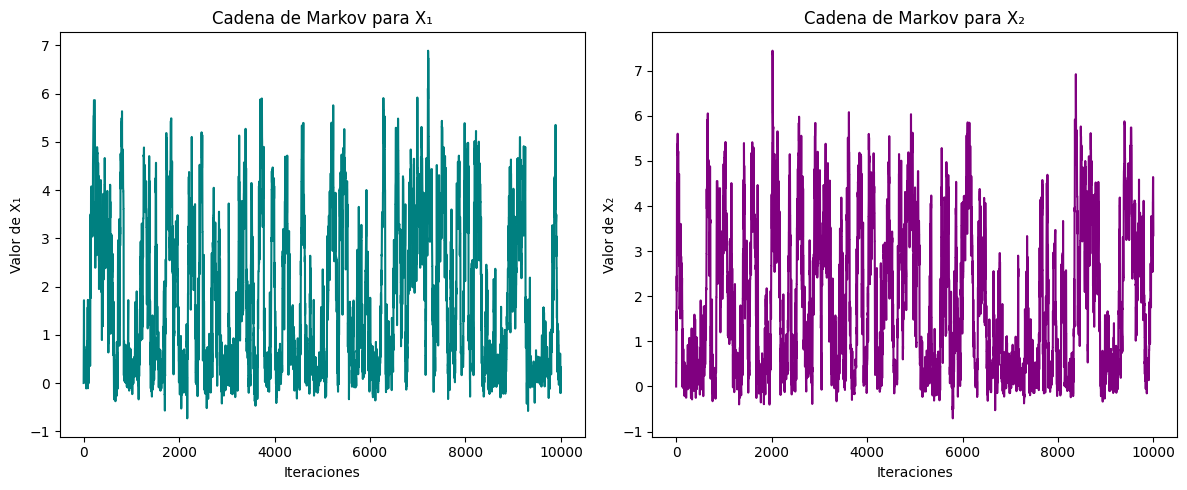

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(x1, color='teal')
plt.title("Cadena de Markov para X₁")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de X₁")

plt.subplot(1,2,2)
plt.plot(x2, color='purple')
plt.title("Cadena de Markov para X₂")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de X₂")

plt.tight_layout()
plt.show()

Ahora, veamos los hisogramas de las muestas, que compararemos con la densidad teorica esperada

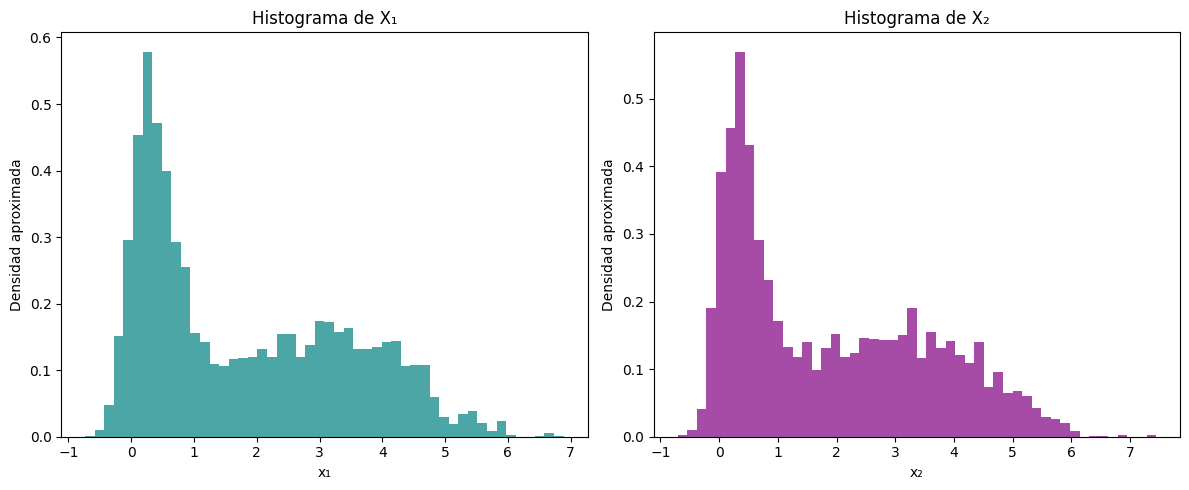

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(x1, bins=50, density=True, color='teal', alpha=0.7)
plt.title("Histograma de X₁")
plt.xlabel("x₁")
plt.ylabel("Densidad aproximada")

plt.subplot(1,2,2)
plt.hist(x2, bins=50, density=True, color='purple', alpha=0.7)
plt.title("Histograma de X₂")
plt.xlabel("x₂")
plt.ylabel("Densidad aproximada")

plt.tight_layout()
plt.show()


Ahora, vamos a graficar los pares de puntos, donde los puntos se agruparan en las zonas de mayor densidad

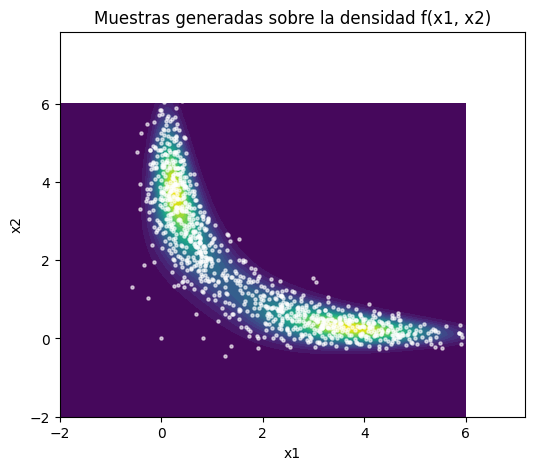

In [49]:
plt.figure(figsize=(6,5))
plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.scatter(x1[::10], x2[::10], s=5, color='white', alpha=0.6)
plt.title("Muestras generadas sobre la densidad f(x1, x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Ahora para encontrar la muestra donde $ f(x_1,x_2) $ es maxima usando las muestras

In [60]:
Z_vals = f(x1, x2)
max_idx = np.argmax(Z_vals)
x1_max, x2_max = x1[max_idx], x2[max_idx]

print("Máximo aproximado encontrado en: x1 =", x1_max ,", x2 =" , x2_max)
print(f"Valor de f(x1,x2) ≈ {f(x1_max, x2_max):.5f}")

Máximo aproximado encontrado en: x1 = 3.74762788914511 , x2 = 0.2649175136358615
Valor de f(x1,x2) ≈ 4914.25515


**¿Por qué funciona el método? **

El proceso garantiza que la distribución estacionaria de la cadena sea $ f(x) $ gracias a la condición de balance detallado:
$$ f(x) P(x → y) = f(y) P(y → x) $$

Esto asegura que la cadena no tenga sesgo si se ejecuta el algoritmo durante suficiente tiempo, los puntos visitados se distribuyen como $ f(x) \\ $


**Conclusión:**

El algoritmo Metropolis-Hastings converge hacia la región de máxima densidad de la función $ f(x_1,x_2) $, encontrando un máximo aproximado en
$$ (x_1,x_2) = (3.75, 0.26) $$
con un valor de $ f(x_1,x_2) ≈ 4914.26 $

Este resultado coincide con la zona de mayor altura observada en la gráfica 3D, confirmando que la cadena de Márkov generada explora correctamente el espacio de estados.
